 # Proyek Klasifikasi Gambar: Fruit and Vegetable Disease (Healthy vs Rotten)


- **Nama:** Sarah Adibah
- **Email:** sarahadibah06@gmail.com
- **ID Dicoding:** [addsarah](https://www.dicoding.com/users/addsarah/academies)

**Submission Proyek CNN untuk Klasifikasi Gambar** mengharuskan peserta menggunakan dataset gambar dengan minimal 1.000 sampel yang belum pernah digunakan sebelumnya. Dataset harus dibagi menjadi train set, test set, dan validation set untuk memastikan evaluasi model yang objektif.

Model yang dibangun harus menggunakan arsitektur **Sequential** dengan lapisan **Conv2D** dan **Pooling** dalam Keras, serta mencapai akurasi minimal **85%** pada training dan testing set. Selain itu, peserta wajib membuat **plot akurasi dan loss** selama proses training untuk memvisualisasikan performa model.

Sebagai bagian dari submission, model harus disimpan dalam tiga format: **SavedModel, TF-Lite, dan TFJS**, agar dapat digunakan di berbagai platform seperti server, perangkat mobile, dan aplikasi berbasis JavaScript.

Untuk mendapatkan nilai tinggi, peserta disarankan menerapkan **callback**, menggunakan dataset lebih besar (≥10.000 gambar), mencapai akurasi ≥95%, serta memiliki minimal tiga kelas. Submission harus mencakup **notebook pelatihan model (`.ipynb`), dataset, dan file hasil kompresi (zip)** agar dapat langsung dievaluasi oleh reviewer tanpa perlu eksekusi ulang.

# **1. Library Install**

In [ ]:
!pip install split-folders tensorflow==2.15.0 tensorflowjs

# **2. Library Import**

In [ ]:
import os
import shutil
import zipfile
import pathlib
import numpy as np
import tensorflow as tf
import splitfolders as sf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten, Dense
from google.colab import files, userdata

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.15.0


# **3. Data Loading**

In [ ]:
# Kaggle username and key
os.environ['KAGGLE_USERNAME'] = 'addsarah'
os.environ['KAGGLE_KEY'] = 'eff5b83c0a0943cd628b2c66f0878a19'

# Download dataset from Kaggle
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten

Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0


In [ ]:
# Unzip the downloaded zip file
local_zip = 'fruit-and-vegetable-disease-healthy-vs-rotten.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# List directory
base_dir = 'Fruit And Vegetable Diseases Dataset'
labels = os.listdir(base_dir)
labels

['Bellpepper__Healthy',
 'Cucumber__Rotten',
 'Pomegranate__Rotten',
 'Orange__Rotten',
 'Carrot__Rotten',
 'Jujube__Healthy',
 'Bellpepper__Rotten',
 'Apple__Rotten',
 'Potato__Healthy',
 'Grape__Healthy',
 'Tomato__Healthy',
 'Guava__Rotten',
 'Carrot__Healthy',
 'Apple__Healthy',
 'Banana__Rotten',
 'Jujube__Rotten',
 'Cucumber__Healthy',
 'Banana__Healthy',
 'Guava__Healthy',
 'Grape__Rotten',
 'Potato__Rotten',
 'Mango__Rotten',
 'Pomegranate__Healthy',
 'Strawberry__Rotten',
 'Tomato__Rotten',
 'Orange__Healthy',
 'Mango__Healthy',
 'Strawberry__Healthy']

In [ ]:
# Dictionary to store folder name and count of images
folder_counts = {}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        folder_counts[folder] = file_count

# Print the results
for folder, count in folder_counts.items():
    print(f"{folder}: {count} images")


Bellpepper__Healthy: 611 images
Cucumber__Rotten: 593 images
Pomegranate__Rotten: 200 images
Orange__Rotten: 2186 images
Carrot__Rotten: 580 images
Jujube__Healthy: 200 images
Bellpepper__Rotten: 591 images
Apple__Rotten: 2930 images
Potato__Healthy: 615 images
Grape__Healthy: 200 images
Tomato__Healthy: 604 images
Guava__Rotten: 200 images
Carrot__Healthy: 620 images
Apple__Healthy: 2438 images
Banana__Rotten: 2800 images
Jujube__Rotten: 200 images
Cucumber__Healthy: 608 images
Banana__Healthy: 2000 images
Guava__Healthy: 200 images
Grape__Rotten: 200 images
Potato__Rotten: 585 images
Mango__Rotten: 2247 images
Pomegranate__Healthy: 200 images
Strawberry__Rotten: 1596 images
Tomato__Rotten: 596 images
Orange__Healthy: 2075 images
Mango__Healthy: 1813 images
Strawberry__Healthy: 1603 images


# **4. Data Preparation**

In [ ]:
# Remove unused image data folder
shutil.rmtree(base_dir + '/Bellpepper__Healthy')
shutil.rmtree(base_dir + '/Bellpepper__Rotten')
shutil.rmtree(base_dir + '/Carrot__Healthy')
shutil.rmtree(base_dir + '/Carrot__Rotten')
shutil.rmtree(base_dir + '/Cucumber__Healthy')
shutil.rmtree(base_dir + '/Cucumber__Rotten')
shutil.rmtree(base_dir + '/Grape__Healthy')
shutil.rmtree(base_dir + '/Grape__Rotten')
shutil.rmtree(base_dir + '/Guava__Healthy')
shutil.rmtree(base_dir + '/Guava__Rotten')
shutil.rmtree(base_dir + '/Jujube__Healthy')
shutil.rmtree(base_dir + '/Jujube__Rotten')
shutil.rmtree(base_dir + '/Orange__Healthy')
shutil.rmtree(base_dir + '/Orange__Rotten')
shutil.rmtree(base_dir + '/Pomegranate__Healthy')
shutil.rmtree(base_dir + '/Pomegranate__Rotten')
shutil.rmtree(base_dir + '/Potato__Healthy')
shutil.rmtree(base_dir + '/Potato__Rotten')
shutil.rmtree(base_dir + '/Mango__Healthy')
shutil.rmtree(base_dir + '/Mango__Rotten')
shutil.rmtree(base_dir + '/Tomato__Healthy')
shutil.rmtree(base_dir + '/Tomato__Rotten')

labels = os.listdir(base_dir)
labels

['Apple__Rotten',
 'Apple__Healthy',
 'Banana__Rotten',
 'Banana__Healthy',
 'Strawberry__Rotten',
 'Strawberry__Healthy']

In [ ]:
categories = ['Strawberry', 'Apple', 'Banana']

# Create merged directories
for category in categories:
    merged_folder = os.path.join(base_dir, category)
    os.makedirs(merged_folder, exist_ok=True)

    # Move healthy and rotten images into the merged folder
    for variant in ['Healthy', 'Rotten']:
        source_folder = os.path.join(base_dir, f"{category}__{variant}")
        if os.path.exists(source_folder):
            for file in os.listdir(source_folder):
                source_path = os.path.join(source_folder, file)
                destination_path = os.path.join(merged_folder, file)
                shutil.move(source_path, destination_path)
            os.rmdir(source_folder)  # Remove empty source folder

print("Folders merged successfully!")

Folders merged successfully!


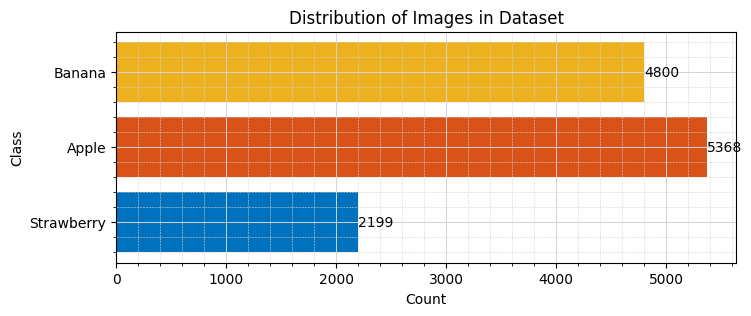

In [ ]:
for category in categories:
    merged_folder = os.path.join(base_dir, category)
    os.makedirs(merged_folder, exist_ok=True)

    for variant in ['Healthy', 'Rotten']:
        source_folder = os.path.join(base_dir, f"{category}__{variant}")
        if os.path.exists(source_folder):
            for file in os.listdir(source_folder):
                shutil.move(os.path.join(source_folder, file), os.path.join(merged_folder, file))
            os.rmdir(source_folder)  # Remove empty source folder

# Count images in each folder
image_counts = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}

# Plot the distribution
plt.figure(figsize=(8, 3))
bars = plt.barh(list(image_counts.keys()), list(image_counts.values()), color=['#0072BD', '#D95319', '#EDB120'])

# Add text labels on bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Distribution of Images in Dataset')
plt.grid(color='lightgray', linestyle='-', linewidth=0.7, which='major')
plt.grid(color='lightgray', linestyle='--', linewidth=0.4, which='minor')
plt.minorticks_on()
plt.show()

# **5. Train-Val Split**

In [ ]:
# Split directory
sf.ratio(
    base_dir,
    output=os.path.join('image'),
    seed=None,
    ratio=(0.8, 0.1, 0.1)
)

Copying files: 12367 files [00:31, 390.09 files/s]


In [ ]:
def count_images_in_directory(directory):
    labels = os.listdir(directory)
    image_counts = {}
    for label in labels:
        folder_path = os.path.join(directory, label)
        image_files = os.listdir(folder_path)
        image_counts[label] = len(image_files)
    return image_counts

train_dir = os.path.join('image', 'train')
val_dir = os.path.join('image', 'val')
test_dir = os.path.join('image', 'test')

train_counts = count_images_in_directory(train_dir)
val_counts = count_images_in_directory(val_dir)
test_counts = count_images_in_directory(test_dir)

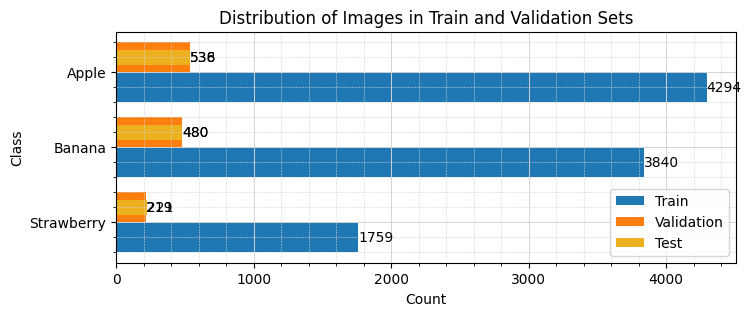

In [ ]:
labels = list(train_counts.keys())
train_values = list(train_counts.values())
val_values = list(val_counts.values())
test_values = list(test_counts.values())

y = range(len(labels))

plt.figure(figsize=(8, 3))

bars1 = plt.barh(y, train_values, height=0.4, label='Train', align='center')
bars2 = plt.barh([i + 0.4 for i in y], val_values, height=0.4, label='Validation', align='center')
bars3 = plt.barh([i + 0.4 for i in y], test_values, height=0.2, label='Test', align='center', color='#EDB120')

plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Distribution of Images in Train and Validation Sets')
plt.yticks([i + 0.2 for i in y], labels)
plt.grid(color='lightgray', linestyle='-', linewidth=0.7, which='major')
plt.grid(color='lightgray', linestyle='--', linewidth=0.4, which='minor')
plt.minorticks_on()
plt.legend()

for bar in bars1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, int(width), ha='left', va='center')

for bar in bars2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, int(width), ha='left', va='center')

for bar in bars3:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, int(width), ha='left', va='center')

plt.show()

# **6. Image Augmentation**

In [ ]:
print(os.listdir(train_dir))
print(os.listdir(val_dir))
print(os.listdir(test_dir))

['Strawberry', 'Banana', 'Apple']
['Strawberry', 'Banana', 'Apple']
['Strawberry', 'Banana', 'Apple']


In [ ]:
# Image Augmentation to artificially generate new data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
# Preperation the training and validation data
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=50,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical',
)

Found 11860 images belonging to 3 classes.
Found 2339 images belonging to 3 classes.
Found 2356 images belonging to 3 classes.


# **7. Model Development**

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

base_model.summary()
print(f'Base Model Layer : {len(base_model.layers)}')

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()
print(f'Model Layer : {len(model.layers)}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 64)          294976    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                36928     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

https://github.com/keras-team/keras/issues/19982

https://github.com/tensorflow/tensorflow/issues/65436

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Stop training callback
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print('\nAccuracy and Validation Accuracy reach > 95%')
            self.model.stop_training = True

stopTraining = stopCallback()

# ReduceLROnPlateau callback
reduceLROP = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2)

In [ ]:
# Model training
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    verbose=1,
    callbacks=[stopTraining, reduceLROP]
)

Epoch 1/5
198/198 [==============================] - ETA: 0s - loss: 0.1013 - accuracy: 0.9651 
Accuracy and Validation Accuracy reach > 95%
198/198 [==============================] - 3814s 19s/step - loss: 0.1013 - accuracy: 0.9651 - val_loss: 0.0213 - val_accuracy: 0.9911 - lr: 0.0010


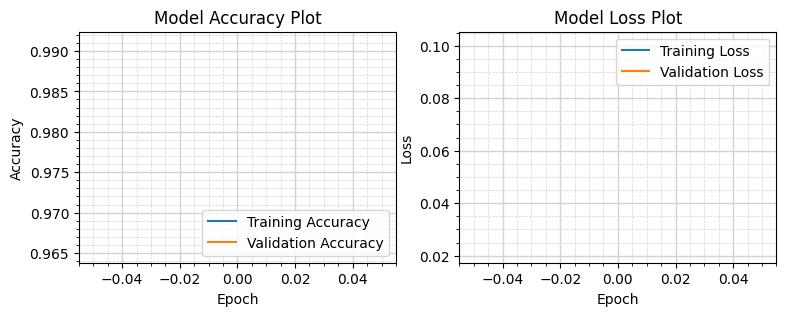

In [ ]:
# @title **Model Accuracy and Loss Plot**
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(color='lightgray', linestyle='-', linewidth=1, which='major')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, which='minor')
plt.minorticks_on()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(color='lightgray', linestyle='-', linewidth=1, which='major')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, which='minor')
plt.minorticks_on()

plt.show()

In [ ]:
model.evaluate(test_gen)

25/25 [==============================] - 413s 16s/step - loss: 0.0208 - accuracy: 0.9935


[0.020765922963619232, 0.9935327172279358]

# **8. Model Inference Testing**

In [ ]:
train_gen.class_indices

{'Apple': 0, 'Banana': 1, 'Strawberry': 2}

In [ ]:
# @title **Prepare Image**
def prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    return images

## **8.1. Saved Model**

In [ ]:
def saved_model_inference(model_dir, input_img_array):
    loaded_model = tf.saved_model.load(model_dir)
    inference = loaded_model.signatures['serving_default']
    in_tensor = tf.convert_to_tensor(input_img_array, dtype=tf.float32)
    output = np.argmax(inference(in_tensor))

    if output == 0:
        print('Image prediction: Apple')
    elif output == 1:
        print('Image prediction: Banana')
    elif output == 2:
        print('Image prediction: Strawberry')

Saving Screen Shot 2018-06-07 at 2.15.20 PM.png to Screen Shot 2018-06-07 at 2.15.20 PM.png
Image prediction: Apple


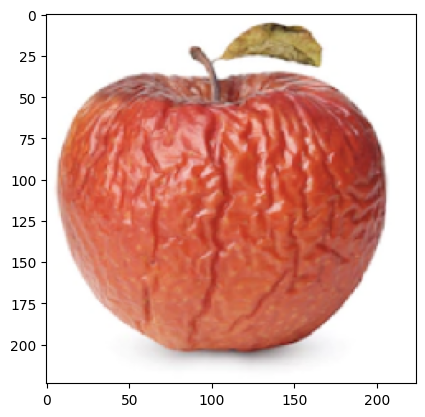

In [ ]:
saved_model_inference(export_dir, prepare_image(next(iter(files.upload().keys()))))

## **8.2. TensorFlow Lite**

In [ ]:
def tf_lite_inference(model_dir, input_img_array):
    interpreter = tf.lite.Interpreter(model_path="model.tflite")
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_img_array)
    interpreter.invoke()

    classes = interpreter.get_tensor(output_details[0]['index'])
    output = np.argmax(classes)

    if output == 0:
        print('Image prediction: Apple')
    elif output == 1:
        print('Image prediction: Banana')
    elif output == 2:
        print('Image prediction: Strawberry')

Saving FreshApple (100).jpg to FreshApple (100) (1).jpg
Image prediction: Apple


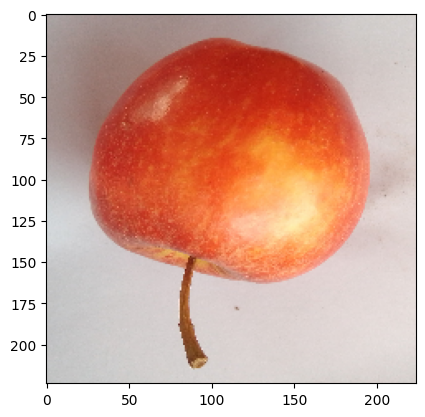

In [ ]:
tf_lite_inference('model.tflite', prepare_image(next(iter(files.upload().keys()))))

# **9. Model Deployment Conversion**

## **9.1. Saved Model**

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
!ls saved_model

assets	fingerprint.pb	saved_model.pb	variables


## **9.2. HDF5 Model**

In [ ]:
model.save('model.keras')

## **9.3. TF-Lite Model**

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(export)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the TF-Lite model
with open('model.tflite', 'wb') as t:
    t.write(tflite_model)

## **9. 4. TensorFlow.js Model**

In [ ]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /content/saved_model/ \
    /content/tfjs_model

2025-03-25 15:42:54.240070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-25 15:42:54.240120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-25 15:42:54.241944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 15:42:55.682941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-03-25 15:42:57.749933: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the gui

# **10. Export Model**

In [ ]:
labels = ['Apple', 'Banana', 'Strawberry']

with open('label.txt', 'w') as f:
    for label in labels:
        f.write(label + '\n')

In [ ]:
!pip freeze > requirements.txt
!zip -r saved_model.zip saved_model/
!zip -r tfjs_model.zip tfjs_model/

  adding: saved_model/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/saved_model.pb (deflated 89%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/variables/variables.index (deflated 65%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard9of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard14of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard12of15.bin (deflated 7%)
  adding: tfjs_model/model.json (deflated 94%)
  adding: tfjs_model/group1-shard1of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard5of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard6of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard13of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard11of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard7of15.bin (deflated 7%)
  adding: tfjs_model/group1-shard8of15.b

In [ ]:
zip_name = 'subimageclassification.zip'
download_files = ['saved_model.zip', 'tfjs_model.zip', 'model.tflite',
                  'model.keras', 'requirements.txt', 'label.txt']

with zipfile.ZipFile(zip_name, 'w') as z:
    for file in download_files:
        z.write(file, compress_type=zipfile.ZIP_DEFLATED)